# Aceleración de partículas


In [1]:
import numpy as np
import h5py
import matplotlib.pyplot as plt
from scipy.interpolate import RegularGridInterpolator
import scienceplots
import scipy as sp

import Boris as boris

#para leer los archivos necesitas instalar el paquete h5py, que lee archivos en formato hdf5 que es el formato de archivos que escribe el codigo de la simulacion.

name='C:/Users/lueiz/Desktop/Intro a la Investigación 2/flds.tot.00085'

f=h5py.File(name,'r') #llamamos al archivo en modo de lectura 'r'
bx=f.get('bx') #obtenemos el campo magnetico en x
bx=np.array(bx)[0,:,:] #fijamos en 0 la primera componente del arreglo porque siempre son en 3 dimensiones, sin embargo la primera tiene solo un elemento
bx=np.transpose(bx) #trasponemos porque la forma en que escribe el codigo y lee python deja las matrices traspuestas

by=f.get('by') #obtenemos el campo magnetico en x
by=np.array(by)[0,:,:] #fijamos en 0 la primera componente del arreglo porque siempre son en 3 dimensiones, sin embargo la primera tiene solo un elemento
by=np.transpose(by) #trasponemos porque la forma en que escribe el codigo y lee python deja las matrices traspuestas

bz=f.get('bz') #obtenemos el campo magnetico en x
bz=np.array(bz)[0,:,:] #fijamos en 0 la primera componente del arreglo porque siempre son en 3 dimensiones, sin embargo la primera tiene solo un elemento
bz=np.transpose(bz) #trasponemos porque la forma en que escribe el codigo y lee python deja las matrices traspuestas

ex=f.get('ex') #obtenemos el campo magnetico en x
ex=np.array(ex)[0,:,:] #fijamos en 0 la primera componente del arreglo porque siempre son en 3 dimensiones, sin embargo la primera tiene solo un elemento
ex=np.transpose(ex) #trasponemos porque la forma en que escribe el codigo y lee python deja las matrices traspuestas

ey=f.get('ey') #obtenemos el campo magnetico en x
ey=np.array(ey)[0,:,:] #fijamos en 0 la primera componente del arreglo porque siempre son en 3 dimensiones, sin embargo la primera tiene solo un elemento
ey=np.transpose(ey) #trasponemos porque la forma en que escribe el codigo y lee python deja las matrices traspuestas

ez=f.get('ez') #obtenemos el campo magnetico en x
ez=np.array(ez)[0,:,:] #fijamos en 0 la primera componente del arreglo porque siempre son en 3 dimensiones, sin embargo la primera tiene solo un elemento
ez=np.transpose(ez) #trasponemos porque la forma en que escribe el codigo y lee python deja las matrices traspuestas

vx=f.get('v3x') #obtenemos el campo magnetico en x
vx=np.array(vx)[0,:,:] #fijamos en 0 la primera componente del arreglo porque siempre son en 3 dimensiones, sin embargo la primera tiene solo un elemento
vx=np.transpose(vx) #trasponemos porque la forma en que escribe el codigo y lee python deja las matrices traspuestas

vy=f.get('v3y') #obtenemos el campo magnetico en x
vy=np.array(vy)[0,:,:] #fijamos en 0 la primera componente del arreglo porque siempre son en 3 dimensiones, sin embargo la primera tiene solo un elemento
vy=np.transpose(vy) #trasponemos porque la forma en que escribe el codigo y lee python deja las matrices traspuestas

vz=f.get('v3z') #obtenemos el campo magnetico en x
vz=np.array(vz)[0,:,:] #fijamos en 0 la primera componente del arreglo porque siempre son en 3 dimensiones, sin embargo la primera tiene solo un elemento
vz=np.transpose(vz) #trasponemos porque la forma en que escribe el codigo y lee python deja las matrices traspuestas

#para las demas componentes del campo magnetico tienes que usar get('by') o 'bz', si quieres el campo electrico están en 'ex', 'ey' y 'ez'

b=np.array((bx,by,bz))

e=np.array((ex,ey,ez))

v=np.array((vx,vy,vz))

Nx=np.size(b[0,:,0])

Ny=np.size(b[0,0,:])

# drift_vel= np.loadtxt('C:/Users/lueiz/Desktop/Intro a la Investigación 2/Introduccion-a-la-Investigacion-II/velocity_drift_00085.txt').reshape(b.shape)

#gamma1= np.loadtxt('/content/gamma1.txt')

print(np.shape(e))


(3, 5250, 1536)


In [2]:
# Obtención de campo electrico no ideal e ideal

e_i = -np.cross(v, b, axis=0) # -v * B

e_ni=e-e_i  # e_i + e_ni = e_tot

# Obtenemos el modulo del campo electrico y magnetico

E_i=np.linalg.norm(e_i,axis=0) # Ideal

E_ni=np.linalg.norm(e_ni,axis=0) # No ideal

E=np.linalg.norm(e,axis=0) # Total

B=np.linalg.norm(b,axis=0) # Magnetico

# Identificación de las zonas de alto campo electrico no ideal

rate=0.1

mascara = (E >= rate * B) # Probar con B=prom(b)=sqrt(prom(b^2))

E_ni_high_index=np.array(np.nonzero(mascara & (E_ni>E_i) & (E_i+E_ni>0.04))) # Quitar la ultima condición

E_i_high_index=np.array(np.nonzero(mascara & (E_i>E_ni) & (E_i+E_ni>0.04)))


Ahora extraeremos E_ni_high_index de tal forma de que nos diga las posiciones iniciales de las particulas las cuales simularemos

## Caso E no ideal

In [3]:
len=E_ni_high_index.size//2

r0 = np.zeros((3,len))

r0[0,:]=E_ni_high_index[0,:]
r0[1,:]=E_ni_high_index[1,:]

v_i = np.zeros_like(r0,dtype=np.float32) # Soltamos la particulas del reposo

gamma0 = np.ones_like(r0[0,:],dtype=np.float32) # gamma(v=0)=1

# Pasos temporales

c=0.45

istep=8

factor=1

dx=1
dt=1*c/istep

NT=6

print(gamma0)

x=np.arange(0,Nx,int(dx))
y=np.arange(0,Ny,int(dx))

t=np.linspace(0,NT,int(NT*155*factor)) # Defino mi Delta t como se obtuvo en en analisis



[1. 1. 1. ... 1. 1. 1.]


In [4]:
r_plot,vel,gamma, W_ideal, W_no_ideal=boris.varias_particulas_trabajo_separados(x,y,v_i,gamma0,r0,v,ex,ey,ez,bx,by,bz,NT,Nx,Ny,dt,-1)

In [5]:
print(np.shape(r_plot))

(930, 3, 1056)


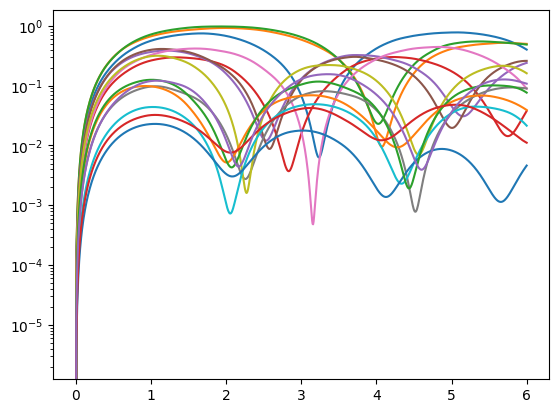

In [6]:
plt.semilogy(t,gamma[:,0]-1)
plt.semilogy(t,gamma[:,1]-1)
plt.semilogy(t,gamma[:,2]-1)
plt.semilogy(t,gamma[:,3]-1)
plt.semilogy(t,gamma[:,4]-1)
plt.semilogy(t,gamma[:,5]-1)
plt.semilogy(t,gamma[:,6]-1)
plt.semilogy(t,gamma[:,7]-1)
plt.semilogy(t,gamma[:,8]-1)
plt.semilogy(t,gamma[:,9]-1)
plt.semilogy(t,gamma[:,10]-1)
plt.semilogy(t,gamma[:,11]-1)
plt.semilogy(t,gamma[:,12]-1)
plt.semilogy(t,gamma[:,13]-1)
plt.semilogy(t,gamma[:,14]-1)

plt.show()


In [7]:
mean1=np.mean(np.max(gamma-1,axis=1))
max1=np.max(np.max(gamma-1,axis=1))

In [8]:
r_plot,vel,gamma, W_ideal, W_no_ideal=boris.varias_particulas_trabajo_separados(x,y,v_i,gamma0,r0,v,ex,ey,ez,bx,by,bz,NT,Nx,Ny,dt,1)


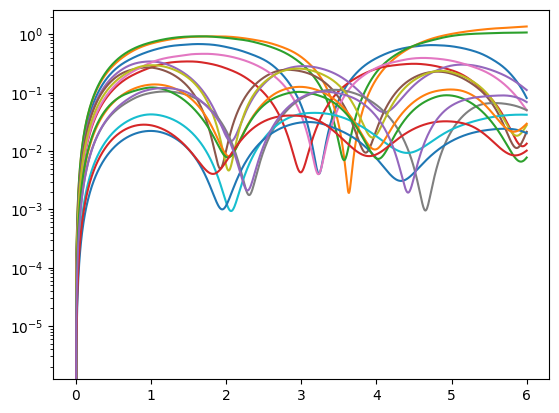

In [9]:
plt.semilogy(t,gamma[:,0]-1)
plt.semilogy(t,gamma[:,1]-1)
plt.semilogy(t,gamma[:,2]-1)
plt.semilogy(t,gamma[:,3]-1)
plt.semilogy(t,gamma[:,4]-1)
plt.semilogy(t,gamma[:,5]-1)
plt.semilogy(t,gamma[:,6]-1)
plt.semilogy(t,gamma[:,7]-1)
plt.semilogy(t,gamma[:,8]-1)
plt.semilogy(t,gamma[:,9]-1)
plt.semilogy(t,gamma[:,10]-1)
plt.semilogy(t,gamma[:,11]-1)
plt.semilogy(t,gamma[:,12]-1)
plt.semilogy(t,gamma[:,13]-1)
plt.semilogy(t,gamma[:,14]-1)

plt.show()


#plt.semilogy(t,gamma-1)

In [10]:
mean2=np.mean(np.max(gamma-1,axis=1))
max2=np.max(np.max(gamma-1,axis=1))


In [11]:
len=E_i_high_index.size//2

r0 = np.zeros((3,len))

print(r0)

r0[0,:]=E_i_high_index[0,:]
r0[1,:]=E_i_high_index[1,:]

v_i = np.zeros_like(r0,dtype=np.float32) # Soltamos la particulas del reposo

gamma0 = np.ones_like(r0[0,:],dtype=np.float32) # gamma(v=0)=1

# Pasos temporales

c=0.45

istep=8

factor=10

dx=1
dt=1*c/istep

NT=6

print(gamma0)

x=np.arange(0,Nx,int(dx))
y=np.arange(0,Ny,int(dx))


[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
[1. 1. 1. ... 1. 1. 1.]


In [12]:
r_plot,vel,gamma, W_ideal, W_no_ideal=boris.varias_particulas_trabajo_separados(x,y,v_i,gamma0,r0,v,ex,ey,ez,bx,by,bz,NT,Nx,Ny,dt,-1)

In [13]:
print(np.shape(r_plot))

(930, 3, 5896)


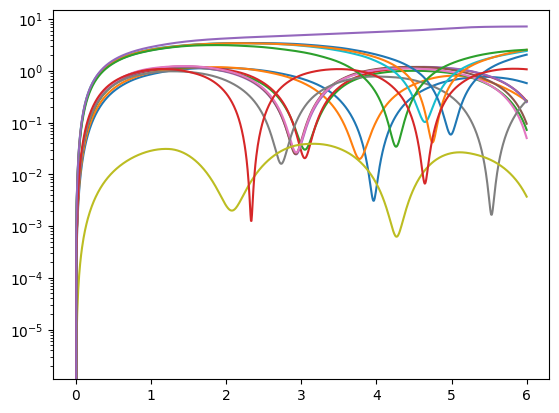

In [14]:
plt.semilogy(t,gamma[:,0]-1)
plt.semilogy(t,gamma[:,1]-1)
plt.semilogy(t,gamma[:,2]-1)
plt.semilogy(t,gamma[:,3]-1)
plt.semilogy(t,gamma[:,4]-1)
plt.semilogy(t,gamma[:,5]-1)
plt.semilogy(t,gamma[:,6]-1)
plt.semilogy(t,gamma[:,7]-1)
plt.semilogy(t,gamma[:,8]-1)
plt.semilogy(t,gamma[:,9]-1)
plt.semilogy(t,gamma[:,10]-1)
plt.semilogy(t,gamma[:,11]-1)
plt.semilogy(t,gamma[:,12]-1)
plt.semilogy(t,gamma[:,13]-1)
plt.semilogy(t,gamma[:,14]-1)

plt.show()


In [15]:
mean3=np.mean(np.max(gamma-1,axis=1))
max3=np.max(np.max(gamma-1,axis=1))

In [16]:
r_plot,vel,gamma, W_ideal, W_no_ideal=boris.varias_particulas_trabajo_separados(x,y,v_i,gamma0,r0,v,ex,ey,ez,bx,by,bz,NT,Nx,Ny,dt,1)

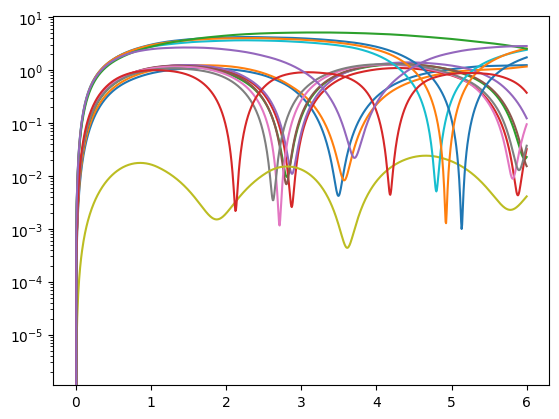

In [17]:
plt.semilogy(t,gamma[:,0]-1)
plt.semilogy(t,gamma[:,1]-1)
plt.semilogy(t,gamma[:,2]-1)
plt.semilogy(t,gamma[:,3]-1)
plt.semilogy(t,gamma[:,4]-1)
plt.semilogy(t,gamma[:,5]-1)
plt.semilogy(t,gamma[:,6]-1)
plt.semilogy(t,gamma[:,7]-1)
plt.semilogy(t,gamma[:,8]-1)
plt.semilogy(t,gamma[:,9]-1)
plt.semilogy(t,gamma[:,10]-1)
plt.semilogy(t,gamma[:,11]-1)
plt.semilogy(t,gamma[:,12]-1)
plt.semilogy(t,gamma[:,13]-1)
plt.semilogy(t,gamma[:,14]-1)

plt.show()


In [18]:
mean4=np.mean(np.max(gamma-1,axis=1))
max4=np.max(np.max(gamma-1,axis=1))

In [19]:
print('Energia promedio para electrones (E no ideal): ' + str(mean1))
print('Energia promedio para positrones (E no ideal): ' + str(mean2))
print('Energia máxima para electrones (E no ideal): ' + str(max1))
print('Energia máxima para positrones (E no ideal): ' + str(max2))

print('Energia promedio para electrones (E ideal): ' + str(mean3))
print('Energia promedio para positrones (E ideal): ' + str(mean4))
print('Energia máxima para electrones (E ideal): ' + str(max3))
print('Energia máxima para positrones (E ideal): ' + str(max4))

Energia promedio para electrones (E no ideal): 1.5700012829135117
Energia promedio para positrones (E no ideal): 1.8637905170186166
Energia máxima para electrones (E no ideal): 2.0877210215854167
Energia máxima para positrones (E no ideal): 3.6242403684737683
Energia promedio para electrones (E ideal): 5.183066513910152
Energia promedio para positrones (E ideal): 5.094393674575149
Energia máxima para electrones (E ideal): 7.662263650104903
Energia máxima para positrones (E ideal): 6.7388388534555554


Calcular trabajos hechos por el E ideal y el E no ideal por separado